In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading in csv file from github repository
url = 'https://raw.githubusercontent.com/evasilva1/data71200sp20/master/Project%201/Data.csv'
vios = pd.read_csv(url, engine='python')

In [3]:
#exploring data for recoding prior to shuffle split
vios.info()
vios.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 20 columns):
Complaint Number                     2373 non-null int64
Previous ECB#                        1762 non-null object
ECB #                                1762 non-null object
License# Rep                         1611 non-null object
Respondent                           1611 non-null object
I_CODE                               2373 non-null object
Section of Law                       2373 non-null object
Violation Description                2373 non-null object
New I_CODE                           2373 non-null object
Complaint Reason                     2373 non-null object
Inspection Date                      2373 non-null object
BIN Number                           2373 non-null int64
Complaint  Category                  2373 non-null object
Complaint  Category Description      2373 non-null object
Complaint  Sub Category 1            2373 non-null int64
1st Unit Assigned Descript

,Complaint Number,BIN Number,Complaint Sub Category 1,Inspector ID
count,2.373000e+03,2.373000e+03,2373.000000,2373.000000
mean,3.188567e+06,2.748777e+06,2.257901,2963.378424
std,1.236724e+06,1.239971e+06,0.586586,122.962415
min,1.501694e+06,1.000027e+06,1.000000,2232.000000
25%,1.528745e+06,1.090462e+06,2.000000,2879.000000
50%,3.700407e+06,3.064046e+06,2.000000,2987.000000
75%,3.728267e+06,3.426412e+06,2.000000,3050.000000
max,5.145594e+06,5.820823e+06,4.000000,3163.000000


## **Cleaning Data**

In [ ]:
#The data used for this project had to be cleaned for several reasons.
#(1) Section of Law, I_CODE and New I_Code had to be turned into nominal/categorical fields as the knn would work.
#(2) Certain classes had few features and had to be removed as stratified split wouldn't fuction
#(3) Removed fields not necessary for the evaluation

In [4]:
#recoding items
vios['Section of Law'].value_counts()

BC3301.3 3310.5             549
BC3301.7(2014 CODE)         290
BC    3301.2                253
AC    27MISCAC28MISCBCMI    232
BC    3301.2 AC27-1009A     158
BC3301.13.3                 142
AC    28-401.9              123
MISC. CHAP.4 OF TITLE 28    116
28-   105.12.2              113
28-116.1                     71
AC    28-105.1               48
BC3301.13.7 THRU .13.13      48
28-104.2.2                   46
AC    28-105.12.2            35
AC    28-301.1               30
AC    1RCNY-MISC,RS-MISC     23
27-1021BC3307.3 3307.6.2     16
28-105.1                     14
BC    3303.4   27-1018       12
BC 3304.4   AC 27-1032       11
27-1050.1 BC3314 3314.4       6
BC3307.1                      5
BC1704.22.1 BC1704.24.1       5
1RCNY 104-20                  5
27-1045 BC3314 BC3314.4       3
BC    3314.2 AC27-1042        2
BC3321.2.3                    2
BC    3303.4.6   27-1018      2
BC    3309.4 AC27-1031        2
BC3307.7                      2
BC3314.4.5 BC3314.4.5.1       2
BC    33

In [5]:
#creating a dict file
sol = {'BC3301.7(2014 CODE)':3301.7,
       'BC    3301.2':3301.2,
      'AC    27MISCAC28MISCBCMI':27.0,
       'BC    3301.2 AC27-1009A':3301.227,
      'BC3301.13.3':3301.133,
       'AC    28-401.9':28.401,
      'MISC. CHAP.4 OF TITLE 28':28.0,
       '28-   105.12.2':28.10512,
      '28-116.1':28.116,
       'BC3301.13.7 THRU .13.13':3301.137,
      'AC    28-105.1':28.1051,
      '28-104.2.2':28.104,
      'AC    28-105.12.2':28.10512,
      'AC    28-301.1':28.1031,
      'AC    1RCNY-MISC,RS-MISC':1.0,
      '27-1021BC3307.3 3307.6.2':27.102,
      '28-105.1':28.1051,
      'BC    3303.4   27-1018':3303.4,
      'BC 3304.4   AC 27-1032':3304.4,
      '27-1050.1 BC3314 3314.4':27.10501,
      'BC3307.1':3307.1,
      '1RCNY 104-20':1.104,
      'BC1704.22.1 BC1704.24.1':'1704.22',
      '27-1045 BC3314 BC3314.4':27.1045,
      'BC    3309.4 AC27-1031':3309.4,
      'BC    3303.4.6   27-1018':3303.4,
      'BC    3314.2 AC27-1042':3314.2,
      'BC3321.2.3':3321.2,
      'BC3314.4.5 BC3314.4.5.1':3314.4,
      'BC3307.7':3307.7,
      'BC    3319.3':3319.3,
      'BC    3303.4 27-1018':3303.4,
      '27-   2009.2':27.2009,
      'ECC   R402.2':402.2,
      '28-   201.1':28.201,
      'BC    3303.8.1':3303.8,
      'BC    3303.15':3303.15,
      'BC3301.3 3310.5':3301.3}

In [6]:
#recoding using dict file
vios['Section of Law'] = [sol[item] for item in vios['Section of Law']]
print(vios)

      Complaint Number Previous ECB#      ECB # License# Rep  \
0              3688599     35385618J  35385618J     GC614625   
1              4789669     35455738P  35455738P     GC616606   
2              1523484     35453536H  35453536H      GC23947   
3              3716783     35448329Z  35448329Z     GC616014   
4              4785607     35449079J  35449079J     GC603645   
...                ...           ...        ...          ...   
2368           3712712     35431843K  35431843K      GC27608   
2369           4781796     35441136K  35441136K       GC2415   
2370           1502273     35385764H  35385764H      GC26860   
2371           2287066     35420812Y  35420812Y     GC614253   
2372           1522362     35455935Y  35455935Y     GC616952   

                     Respondent I_CODE Section of Law  \
0     KISHAN PLUMBING & HEATING    101        28.1051   
1        METROCITY CONSTRUCTION    101        28.1051   
2         PAVARIA MC GOVERN LLC    101        28.1051   
3  

In [7]:
#see new section of law recoded
print(vios['Section of Law'].value_counts())

3301.3      549
3301.7      290
3301.2      253
27.0        232
3301.227    158
28.10512    148
3301.133    142
28.401      123
28.0        116
28.116       71
28.1051      62
3301.137     48
28.104       46
28.1031      30
1.0          23
27.102       16
3303.4       15
3304.4       11
27.10501      6
1.104         5
1704.22       5
3307.1        5
27.1045       3
3307.7        2
3309.4        2
3314.4        2
3321.2        2
3314.2        2
27.2009       1
3303.8        1
3303.15       1
402.2         1
28.201        1
3319.3        1
Name: Section of Law, dtype: int64


In [8]:
#checking value counts
vios['I_CODE'].value_counts()
#recoding long way
vios.I_CODE[vios.I_CODE == '1F2'] = '1'
vios.I_CODE[vios.I_CODE == '1G6'] = '2'
vios.I_CODE[vios.I_CODE == '2A7'] = '3'
vios.I_CODE[vios.I_CODE == '1G5'] = '4'
vios.I_CODE[vios.I_CODE == '2F7'] = '5'
vios.I_CODE[vios.I_CODE == '2G5'] = '6'
vios.I_CODE[vios.I_CODE == '1K5'] = '7'
vios.I_CODE[vios.I_CODE == '2K8'] = '8'
vios.I_CODE[vios.I_CODE == '2F1'] = '9'
vios.I_CODE[vios.I_CODE == '1C3'] = '10'
vios.I_CODE[vios.I_CODE == '1C2'] = '11'
vios.I_CODE[vios.I_CODE == '2G6'] = '12'
print(vios)

      Complaint Number Previous ECB#      ECB # License# Rep  \
0              3688599     35385618J  35385618J     GC614625   
1              4789669     35455738P  35455738P     GC616606   
2              1523484     35453536H  35453536H      GC23947   
3              3716783     35448329Z  35448329Z     GC616014   
4              4785607     35449079J  35449079J     GC603645   
...                ...           ...        ...          ...   
2368           3712712     35431843K  35431843K      GC27608   
2369           4781796     35441136K  35441136K       GC2415   
2370           1502273     35385764H  35385764H      GC26860   
2371           2287066     35420812Y  35420812Y     GC614253   
2372           1522362     35455935Y  35455935Y     GC616952   

                     Respondent I_CODE Section of Law  \
0     KISHAN PLUMBING & HEATING    101        28.1051   
1        METROCITY CONSTRUCTION    101        28.1051   
2         PAVARIA MC GOVERN LLC    101        28.1051   
3  

C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_laun

In [9]:
#checking value counts
print(vios['New I_CODE'].value_counts())

119    554
1F2    290
209    198
1G6    190
115    167
109    140
191    123
147    116
182    113
210     79
2A7     74
1G5     42
201     40
114     37
102     30
131     21
282     19
101     16
214     13
181     13
110     11
2F7      8
149      8
223      8
121      8
1K5      7
2G5      6
261      6
148      6
1C2      5
144      5
211      3
183      2
123      2
130      2
1K6      2
129      2
2G6      1
1C3      1
177      1
2F1      1
187      1
212      1
2K8      1
Name: New I_CODE, dtype: int64


In [10]:
#get names of indices for which New I_CODE
indexNames = vios[(vios['New I_CODE'] == '1C3') | (vios['New I_CODE'] == '2K8') |
                  (vios['New I_CODE'] == '187') | (vios['New I_CODE'] == '212') |
                  (vios['New I_CODE'] == '177') | (vios['New I_CODE'] == '2F1') |
                  (vios['New I_CODE'] == '2G6') | (vios['New I_CODE'] == '129') |
                  (vios['New I_CODE'] == '130') | (vios['New I_CODE'] == '183') |
                  (vios['New I_CODE'] == '1K6') | (vios['New I_CODE'] == '123') |
                  (vios['New I_CODE'] == '211') | (vios['New I_CODE'] == '144') |
                  (vios['New I_CODE'] == '1C2') | (vios['New I_CODE'] == '148') |
                  (vios['New I_CODE'] == '2G5') | (vios['New I_CODE'] == '261') |
                  (vios['New I_CODE'] == '1K5') | (vios['New I_CODE'] == '2F7') |
                  (vios['New I_CODE'] == '223') | (vios['New I_CODE'] == '149') |
                  (vios['New I_CODE'] == '121')].index

#delete these row indexes from dataFrame
vios.drop(indexNames, inplace=True)

In [11]:
print(vios['New I_CODE'].value_counts())

119    554
1F2    290
209    198
1G6    190
115    167
109    140
191    123
147    116
182    113
210     79
2A7     74
1G5     42
201     40
114     37
102     30
131     21
282     19
101     16
181     13
214     13
110     11
Name: New I_CODE, dtype: int64


In [12]:
#recoding long way
vios['New I_CODE'][vios['New I_CODE'] == '1F2'] = '1'
vios['New I_CODE'][vios['New I_CODE'] == '1G6'] = '2'
vios['New I_CODE'][vios['New I_CODE'] == '2A7'] = '3'
vios['New I_CODE'][vios['New I_CODE'] == '1G5'] = '6'
print(vios)

      Complaint Number Previous ECB#      ECB # License# Rep  \
0              3688599     35385618J  35385618J     GC614625   
1              4789669     35455738P  35455738P     GC616606   
2              1523484     35453536H  35453536H      GC23947   
3              3716783     35448329Z  35448329Z     GC616014   
4              4785607     35449079J  35449079J     GC603645   
...                ...           ...        ...          ...   
2351           2294279     35468203L  35468203L          NaN   
2352           1525088     35461711X  35461711X     GC617778   
2353           4799806     35462694H  35462694H          NaN   
2354           1530808     35463860Z  35463860Z       GC6501   
2355           4799678     35462917X  35462917X     GC618588   

                     Respondent I_CODE Section of Law  \
0     KISHAN PLUMBING & HEATING    101        28.1051   
1        METROCITY CONSTRUCTION    101        28.1051   
2         PAVARIA MC GOVERN LLC    101        28.1051   
3  

C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\evasi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [13]:
#rid of columns not needed
vios = vios.drop(["Previous ECB#","Complaint Number","License# Rep",
                 "Respondent","Violation Description","Complaint Reason",
                 "Inspection Date","Complaint  Sub Category 1",
                 "Disposition Date","Disposition Code",
                 "Complaint Disposition Description",
                 "ECB #", "Complaint  Category",
                 "Complaint  Category Description",
                 "1st Unit Assigned Description"],axis=1)
print(vios.dtypes)

I_CODE            object
Section of Law    object
New I_CODE        object
BIN Number         int64
Inspector ID       int64
dtype: object


In [14]:
#reorder columns_move New I_CODE to the end
cols_at_end = ['New I_CODE']
vios = vios[[c for c in vios if c not in cols_at_end] 
        + [c for c in cols_at_end if c in vios]]

print(vios.dtypes)

I_CODE            object
Section of Law    object
BIN Number         int64
Inspector ID       int64
New I_CODE        object
dtype: object


## **Target: New I_Code, New Violation Code**

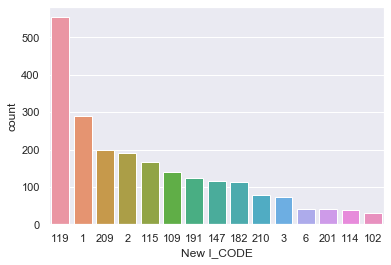

<Figure size 2160x1440 with 0 Axes>

In [15]:
# histograms for categorical data types; New I_CODE (target)
import seaborn as sns
sns.set(style="darkgrid")
inf = sns.countplot(x="New I_CODE",data=vios,
                   order=vios["New I_CODE"].value_counts().iloc[:15].index)
plt.figure(figsize=(30,20))
plt.show()

## **Stratified Shuffle Split**

In [16]:
#StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

features = vios.loc[:,'I_CODE':'Inspector ID']
X = features.values
y = vios['New I_CODE'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,
                              random_state=42)
for train_index, test_index in split.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

X.shape: (2286, 4) y.shape: (2286,)


## **K-Nearest Neighbors**

cv_scores:
[0.23655914 0.26344086 0.22615804 0.21052632 0.26123596]
cv_scores mean:
0.2395840617985585


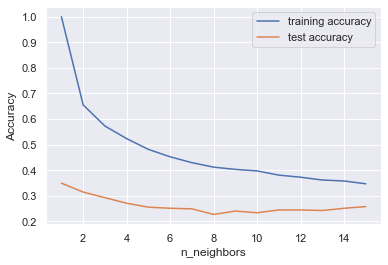

In [17]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#cross validation knn
from sklearn.model_selection import cross_val_score

training_accuracy = []
test_accuracy = []

#try n-neighbors from 1 to 15
neighbors_settings = range(1,16)

#creating for loop with model + cross validation
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #recording training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    #recording generalization accuracy
    test_accuracy.append(knn.score(X_test,y_test))
    
#5-fold cross validation (number can change)
cv_scores = cross_val_score(knn,X_train,y_train,cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### **Knn: Manhattan Distance**

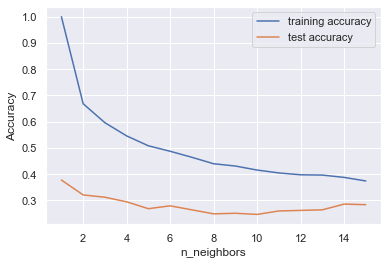

In [18]:
#used both manhattan and weighted with inverse distance
#inverse distance did not look any different from original
#kept manhattan as changes are seen in the graph
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### **Knn: Changing the Algorithm, Algorithm = Auto**

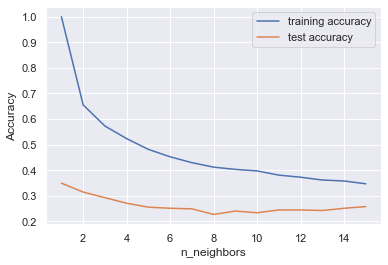

In [19]:
#using auto
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="auto")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### **Knn: Algorithm = Brute**

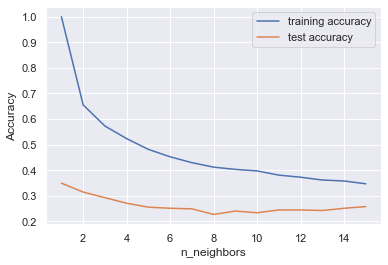

In [20]:
#using brute
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### **Knn: Grid Search**

In [25]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 1}

In [27]:
#accuracy of best performing k
knn_gscv.best_score_

0.3085339168490153

In [28]:
# accuracy of k = 1 on testing data 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.34934497816593885


### **Knn: Confusion Matrix**

In [29]:
#Confusion Matrix
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn2.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[26  0  0  4  1  0  7 13  0  1  0  0  1  2  0  0  0  0  0  1  2]
 [ 0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  1  0  1  0  2  0  0  0  0  0  0  0]
 [ 2  1  0 11  0  0  1  3  0  3  0  2  2  2  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  1  1  1  0  1  1  0  0  0  0  0  0  0  0]
 [ 7  0  0  2  0  0 11 12  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [23  0  0  4  2  0 17 59  0  1  0  0  0  3  0  1  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1  3  0  2  0  0  0 12  0  2  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  1  0  3  1  1  3  2  0  8  1  1  0  0  0  0  0  0  0]
 [ 1  0  2  2  0  1  0  2  2  5  0  5  3  0  0  0  2  0  0  0  0]
 [11  0  0  3  0  0  6  9  0  1  0  3  0  3  0  0  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  3  3  0  0  0  0  0  0

In [30]:
#Using Confusion Matrix for Best Params
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn1.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[19  0  0  2  1  0  6 15  0  1  0  0  1  5  0  2  0  0  0  1  5]
 [ 0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  9  0  0  1  5  0  2  0  2  3  3  0  1  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  1  0  1  2  0  0  0  0  0  0  1  0]
 [ 4  0  0  2  0  0 11 12  0  0  0  1  0  2  0  1  0  0  0  0  0]
 [10  0  0  4  2  0  9 70  0  1  2  0  0  4  0  8  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  1  0]
 [ 0  0  1  1  0  2  0  0  0  5  0  1  5  1  0  0  4  1  2  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  1  0  1  3  0  8  3  0  2  0  1  1  0  0  0]
 [ 0  0  1  3  0  1  0  2  2  4  0  4  3  0  1  0  1  0  0  3  0]
 [ 7  0  0  2  0  0  1 10  0  0  0  2  0  8  0  4  2  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  2  1  0  2  0  0  2  0

In [31]:
#Precision - Recall- F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test, knn2.predict(X_test),
                            target_names=["119","1F2","209",
                                          "1G6","115","109",
                                          "191","147","182",
                                          "210","2A7","1G5",
                                          "201","114","102",
                                          "131","282","101",
                                          "181","214","110"]))

              precision    recall  f1-score   support

         119       0.32      0.45      0.37        58
         1F2       0.17      0.33      0.22         3
         209       0.00      0.00      0.00         6
         1G6       0.24      0.39      0.30        28
         115       0.33      1.00      0.50         2
         109       0.12      0.14      0.13         7
         191       0.22      0.33      0.27        33
         147       0.48      0.53      0.50       111
         182       0.12      0.25      0.17         4
         210       0.32      0.52      0.40        23
         2A7       0.00      0.00      0.00         3
         1G5       0.24      0.35      0.28        23
         201       0.17      0.12      0.14        25
         114       0.18      0.08      0.11        38
         102       0.00      0.00      0.00         8
         131       0.80      0.10      0.18        40
         282       0.17      0.06      0.09        16
         101       0.00    

## **Support Vector Machines**

In [ ]:
##tried to run SVM but it doesn't load, so I commented out
##below is my last tried using cross validation
#from sklearn.svm import SVC

#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=42)

In [ ]:
##grid search cv
##from sklearn.model_selection import GridSearchCV
#C_range = np.logspace(-2,10,13)
#gamma_range = np.logspace(-9,3,13)
#param_grid = dict(gamma=gamma_range, C=C_range)

### **SVM: Polynomial**

In [ ]:
## polynomial kernel
#gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
#gridPoly.fit(X_train, y_train)

#print("The best parameters are %s with a score of %0.2f"
#      % (gridPoly.best_params_, gridPoly.best_score_))

In [ ]:
# # polynomial kernel
# svmPolyGrid = SVC(kernel='poly', C=0.1, gamma=0.1).fit(X_train, y_train)

# print("Accuracy on training set: {:.2f}".format(svmPolyGrid.score(X_train, y_train)))
# print("Accuracy on test set: {:.2f}".format(svmPolyGrid.score(X_test, y_test)))

### **SVM: Radial**

In [ ]:
# #rbf kernel
# gridRBF = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
# gridRBF.fit(X_train, y_train)

# print("The best parameters are %s with a score of %0.2f"
#       % (gridRBF.best_params_, gridRBF.best_score_))

In [ ]:
# svmRBFgrid = SVC(kernel='rbf', C=1, gamma=0.1).fit(X_train, y_train)

# print("Accuracy on training set: {:.2f}".format(svmRBFgrid.score(X_train, y_train)))
# print("Accuracy on test set: {:.2f}".format(svmRBFgrid.score(X_test, y_test)))

## **Decision Trees**

In [32]:
#decision trees, no max_depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

#add target names
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["119","1F2","209",
                                          "1G6","115","109",
                                          "191","147","182",
                                          "210","2A7","1G5",
                                          "201","114","102",
                                          "131","282","101",
                                          "181","214","110"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.913
              precision    recall  f1-score   support

         119       0.95      0.93      0.94        58
         1F2       0.60      1.00      0.75         3
         209       1.00      1.00      1.00         6
         1G6       0.54      0.50      0.52        28
         115       1.00      1.00      1.00         2
         109       0.11      0.14      0.12         7
         191       0.97      0.97      0.97        33
         147       0.98      1.00      0.99       111
         182       0.50      0.50      0.50         4
         210       0.90      0.83      0.86        23
         2A7       1.00      1.00      1.00         3
         1G5       1.00      1.00      1.00        23
         201       0.92      0.96      0.94        25
         114       1.00      0.89      0.94        38
         102       1.00      1.00      1.00         8
         131       0.98      1.00      0.99        40
         282       0.

In [33]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.23012753 0.67189472 0.06632717 0.03165058]


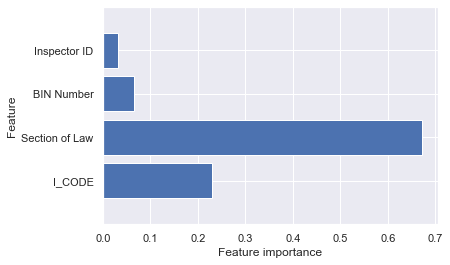

In [38]:
#using plot feature importance vios
def plot_feature_importances_vios(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ('I_CODE','Section of Law','BIN Number','Inspector ID'))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_vios(tree)

### **Decision Trees: Max Depth = 3**

In [47]:
#max_depth of 3
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0, splitter='best')
tree3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree3.score(X_test, y_test)))
print(classification_report(y_test, tree3.predict(X_test),
                            target_names=["119","1F2","209",
                                          "1G6","115","109",
                                          "191","147","182",
                                          "210","2A7","1G5",
                                          "201","114","102",
                                          "131","282","101",
                                          "181","214","110"]))

Accuracy on training set: 0.602
Accuracy on test set: 0.600
              precision    recall  f1-score   support

         119       0.98      0.95      0.96        58
         1F2       0.00      0.00      0.00         3
         209       0.00      0.00      0.00         6
         1G6       0.00      0.00      0.00        28
         115       0.40      1.00      0.57         2
         109       0.00      0.00      0.00         7
         191       1.00      0.94      0.97        33
         147       1.00      0.98      0.99       111
         182       0.00      0.00      0.00         4
         210       0.00      0.00      0.00        23
         2A7       0.00      0.00      0.00         3
         1G5       0.00      0.00      0.00        23
         201       0.00      0.00      0.00        25
         114       0.18      1.00      0.31        38
         102       0.00      0.00      0.00         8
         131       0.78      1.00      0.88        40
         282       0.

In [49]:
print("Feature importances:")
print(tree2.feature_importances_)

Feature importances:
[3.09401820e-02 9.68903057e-01 1.56760903e-04 0.00000000e+00]


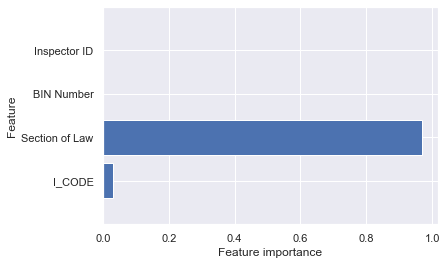

In [50]:
#using plot feature importance vios
def plot_feature_importances_vios(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ('I_CODE','Section of Law','BIN Number','Inspector ID'))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_vios(tree2)

### **Decision Trees: Max Depth = 10**

In [63]:
#max_depth changed to 10
tree10 = DecisionTreeClassifier(max_depth= 10,random_state=0)
tree10.fit(X_train,y_train)

#need tp change the classification report target names
print("Accuracy on training set: {:.3f}".format(tree10.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree10.score(X_test, y_test)))
print(classification_report(y_test, tree10.predict(X_test),
                            target_names=["119","1F2","209",
                                          "1G6","115","109",
                                          "191","147","182",
                                          "210","2A7","1G5",
                                          "201","114","102",
                                          "131","282","101",
                                          "181","214","110"]))

Accuracy on training set: 0.935
Accuracy on test set: 0.921
              precision    recall  f1-score   support

         119       0.98      0.93      0.96        58
         1F2       0.00      0.00      0.00         3
         209       0.67      1.00      0.80         6
         1G6       0.50      0.89      0.64        28
         115       1.00      1.00      1.00         2
         109       0.40      0.29      0.33         7
         191       0.97      0.97      0.97        33
         147       1.00      0.98      0.99       111
         182       1.00      0.50      0.67         4
         210       1.00      0.87      0.93        23
         2A7       1.00      1.00      1.00         3
         1G5       1.00      1.00      1.00        23
         201       0.96      0.96      0.96        25
         114       1.00      0.84      0.91        38
         102       1.00      1.00      1.00         8
         131       0.98      1.00      0.99        40
         282       0.

In [64]:
print("Feature importances:")
print(tree10.feature_importances_)

Feature importances:
[0.24054727 0.74165081 0.015405   0.00239692]


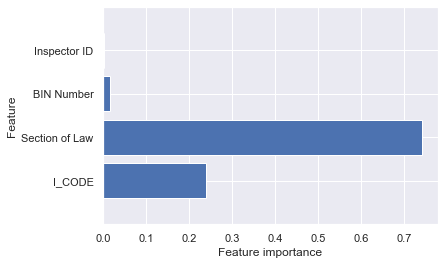

In [65]:
#using plot feature importance vios
def plot_feature_importances_vios(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ('I_CODE','Section of Law','BIN Number','Inspector ID'))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_vios(tree7)